>#### **Project Title**
- Predicting Water Potability Using Machine Learning Models

> #### **Objective**
- To build a classification model that predicts whether a given water sample is potable (safe for drinking) based on its chemical and physical characteristics.

> #### **Business Goal** 
The goal is to assist water quality monitoring organizations and public health authorities by:
- Automating the detection of unsafe drinking water.
- Reducing the need for manual lab testing in early screening stages.
- Ensuring timely identification of unsafe water sources to prevent health issues in communities.

> #### **1. Load Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("water_potability.csv")
df.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


In [4]:
df.shape

(3276, 10)

### Dataset Description
- **Rows:** 3,276

- **Columns:**  10
- **Target Variable:**   `Potability` =>  Values: `0` = Not potable (unsafe for drinking) `1` = Potable (safe for drinking)
- **Prediction Task:**  Predict whether a given water sample is safe (1) or unsafe (0) for drinking based on its features like pH, Hardness, Solids, Chloramines, etc.
- `Type:` Binary Classification

> #### **2. Data Preprocessing**

> ##### **2.1. Data Cleaning**

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0])*100   

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

- we only have 10 features, so drop the feature `Sulfate` is not worthable. so fill with median.
- Because These columns are scientifically relevant for water quality.

In [9]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)


In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

> ##### **2.2. Handle Duplicates**

In [10]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

> ##### **2.3. Data Inconsistencies and Errors**

- in our dataset have no `datetime` and `object type` columns, so we cannot face inconsistent date format and categorical mismatches.
- In our dataset have no irrelevant and redundent features.

> ##### **2.4. ENCODING**
- our data is encoded

> ##### **2.5. Handle Outliers** 

In [12]:
# Calculate outlier percentage for all features in the dataset using IQR method
def calculate_outlier_percentages(df):
    outlier_percentages = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentages[col] = len(outliers) / len(df) * 100  # Percentage of outliers
    return outlier_percentages

outlier_percentages_all = calculate_outlier_percentages(df)
outlier_percentages_all

{'ph': 4.334554334554334,
 'Hardness': 2.5335775335775335,
 'Solids': 1.4346764346764347,
 'Chloramines': 1.862026862026862,
 'Sulfate': 8.058608058608058,
 'Conductivity': 0.3357753357753358,
 'Organic_carbon': 0.7631257631257631,
 'Trihalomethanes': 1.6483516483516485,
 'Turbidity': 0.57997557997558,
 'Potability': 0.0}

- the outlier percentages is below than 5%. so no need to remove outlier.

In [13]:
df.to_csv('cleaned_water_potability.csv', index=False)

> ##### **Import Cleaned file**

In [14]:
data = pd.read_csv("cleaned_water_potability.csv")
data.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0


In [16]:
data.shape

(3276, 10)

In [15]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

> ##### **2.6. EDA Visualization**
- Check Data Linear or Not Linear

In [18]:
visual_data = data.copy()

In [19]:
visual_data.shape

(3276, 10)

In [20]:
print(visual_data.columns.tolist())

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


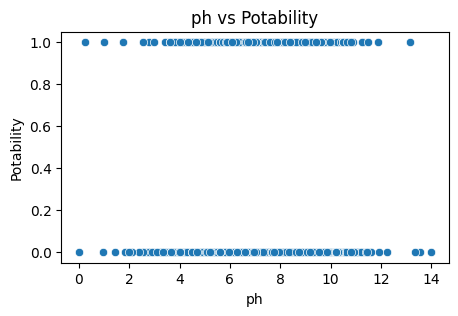

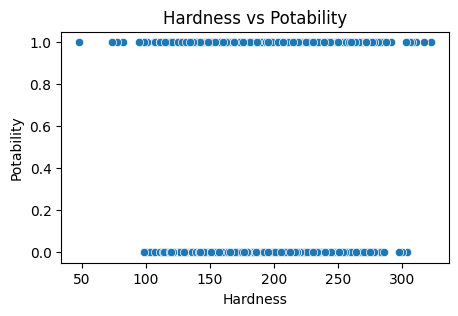

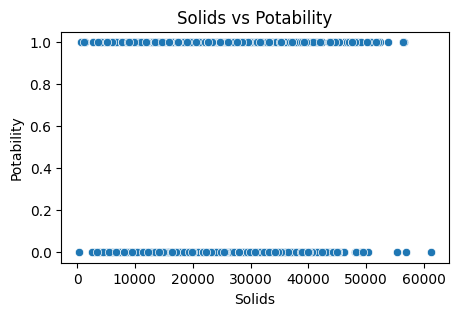

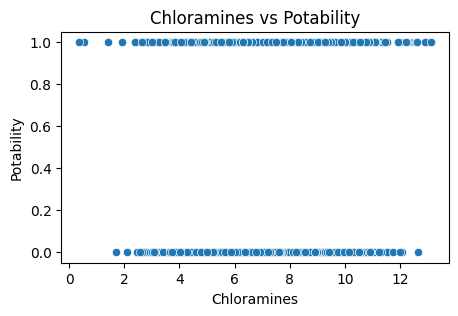

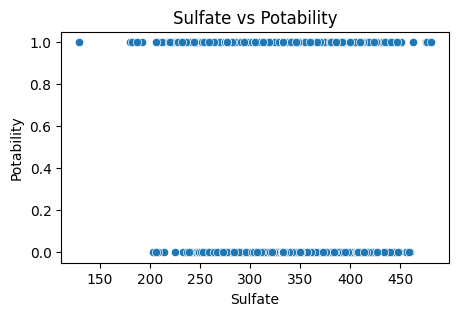

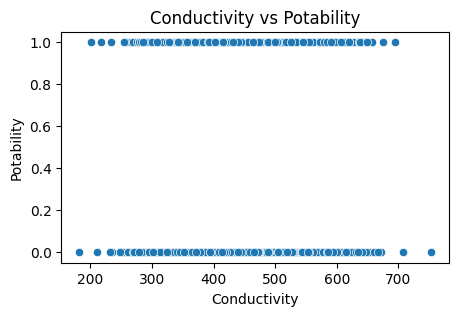

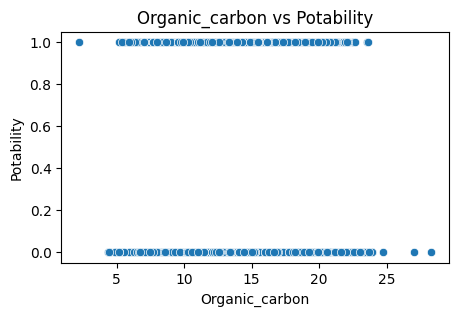

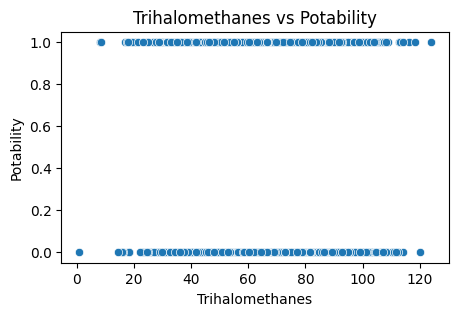

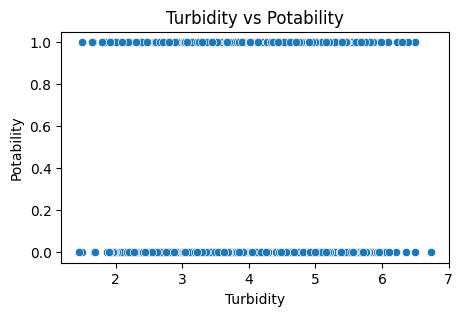

In [22]:
# Plot each feature against the target
import matplotlib.pyplot as plt
import seaborn as sns

features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability' 

for col in features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=visual_data[col], y=visual_data[target])
    plt.title(f"{col} vs {target}")
    plt.show()

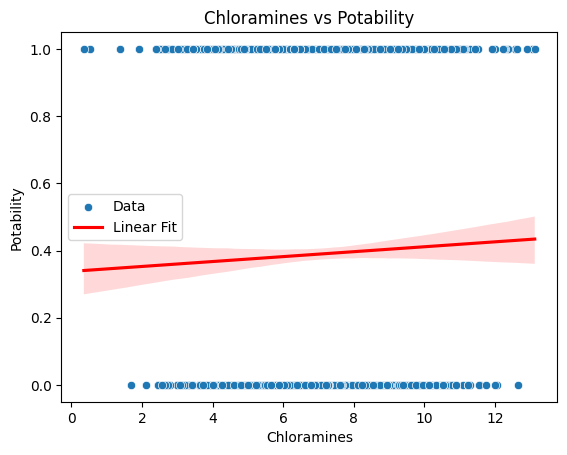

In [23]:
# scatter plot is the simplist and best ways to ckeck linear and non linear.
# set feature one by one
sns.scatterplot(x=visual_data['Chloramines'], y=visual_data['Potability'], label='Data')
sns.regplot(x='Chloramines', y='Potability', data=visual_data, scatter=False, color='red', label='Linear Fit')
plt.title('Chloramines vs Potability')
plt.legend()
plt.show()

> ##### Univariate Analysis

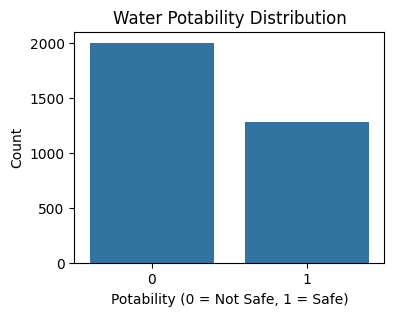

In [72]:
# Target Variable —>  Potability
# We count that how many samples are potable vs not potable.
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='Potability')
plt.title('Water Potability Distribution')
plt.xlabel('Potability (0 = Not Safe, 1 = Safe)')
plt.ylabel('Count')
plt.show()


- this helps that detect class imbalance
- Important for choosing the right model or applying SMOTE/oversampling

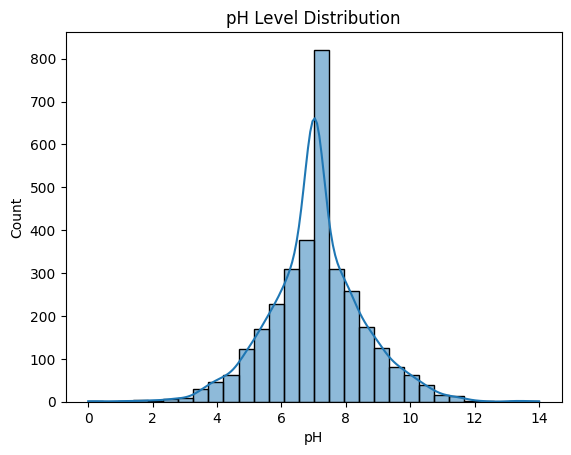

In [ ]:
# pH distribution
# Visualize how pH levels are distributed in water samples.
sns.histplot(data=df, x='ph', kde=True, bins=30)
plt.title('pH Level Distribution')
plt.xlabel('pH')
plt.show()


- this help for business learns if most water is acidic, neutral, or basic.
- Helps health departments see pH safety compliance.

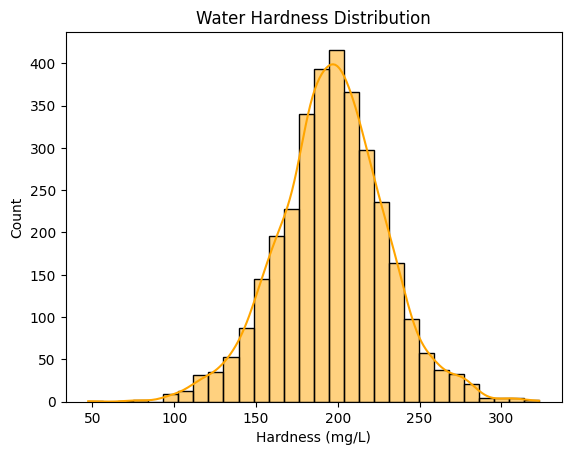

In [ ]:
#Hardness Distribution
sns.histplot(df['Hardness'], bins=30, kde=True, color='orange')
plt.title('Water Hardness Distribution')
plt.xlabel('Hardness (mg/L)')
plt.show()


- it helps industries check if water is corrosive or scaling.
- Business can decide on softening/filtering processes.

> #### Bivariate and Multivariate Analysis

In [76]:
sns.set(style='whitegrid', palette='pastel')

- apply features one by one and check data distribution

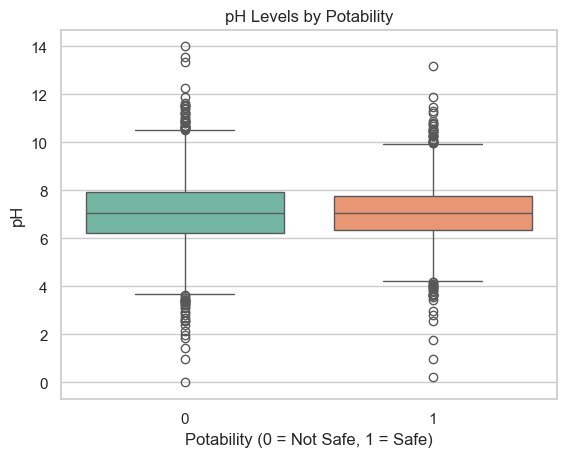

In [77]:
# Boxplot: pH vs Potability
# 
sns.boxplot(x='Potability', y='ph', data=df, palette='Set2')
plt.title('pH Levels by Potability')
plt.xlabel('Potability (0 = Not Safe, 1 = Safe)')
plt.ylabel('pH')
plt.show()


- Safe water has more neutral pH range.
- Unsafe water often has very acidic or basic pH.

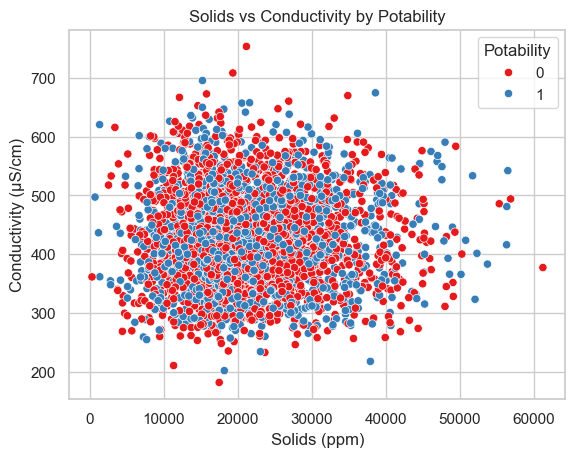

In [78]:
# Scatter Plot: Solids vs Conductivity (Colored by Potability)
sns.scatterplot(data=df, x='Solids', y='Conductivity', hue='Potability', palette='Set1')
plt.title('Solids vs Conductivity by Potability')
plt.xlabel('Solids (ppm)')
plt.ylabel('Conductivity (μS/cm)')
plt.show()


- `Insight:` it helps to identify if higher solids lead to higher conductivity, and if this relates to potability.

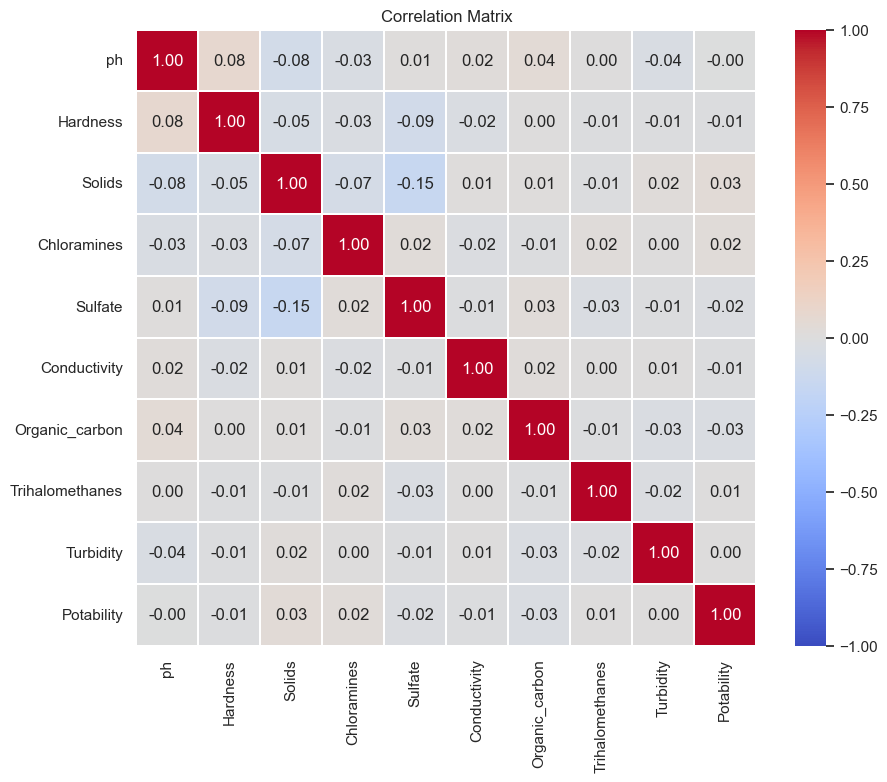

In [80]:
#  correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3, vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix")
plt.show()


- `Insight:` it shows how features are linearly related to each other. Useful for detecting redundancy or multicollinearity.

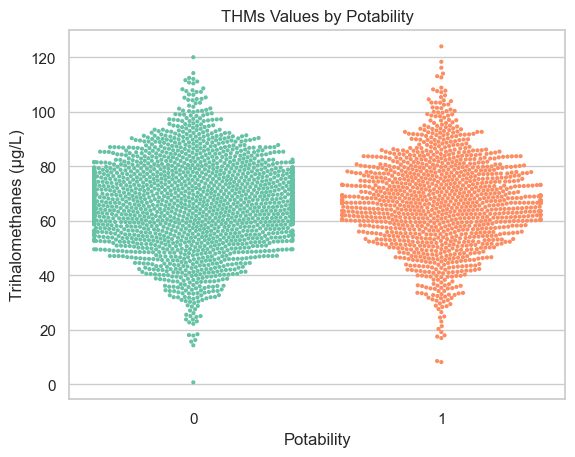

In [81]:
# Swarm Plot: Trihalomethanes vs Potability
sns.swarmplot(x='Potability', y='Trihalomethanes', data=df, palette='Set2', size=3)
plt.title('THMs Values by Potability')
plt.xlabel('Potability')
plt.ylabel('Trihalomethanes (μg/L)')
plt.show()


- `Insight:` Each dot is one sample. Great for seeing density + spread.

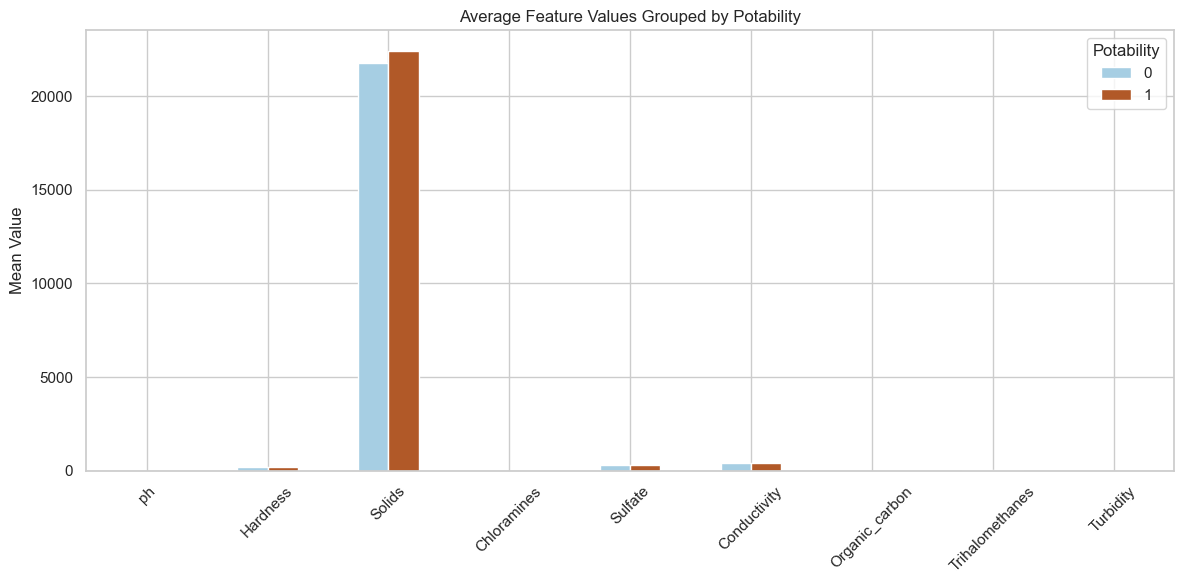

In [82]:
# grouped bar chart: average feature values by Potability
feature_means = df.groupby('Potability').mean().T
feature_means.plot(kind='bar', figsize=(12,6), colormap='Paired')
plt.title('Average Feature Values Grouped by Potability')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Potability')
plt.tight_layout()
plt.show()


- `Insight:` it compare how feature means change between safe and unsafe water. this helpful for simple and powerful for business.

In [ ]:
# Pairplot: Top Correlated Features with Potability
corr = df.corr()['Potability'].abs().sort_values(ascending=False) # First, find top correlated features:
top_features = corr[1:5].index.tolist()

In [ ]:
sns.pairplot(df, vars=top_features, hue='Potability', palette='husl')
plt.suptitle("Pairplot of Top Features vs Potability", y=1.02)
plt.show()


- `Insight:` Explore patterns between multiple variables at once colored by potability.

> #### **3. SCALING**

In [24]:
x = data.drop(columns='Potability')
y = data['Potability']

In [25]:
x.shape

(3276, 9)

In [26]:
y.shape

(3276,)

In [27]:
from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
# Ensure X remains a DataFrame
# x_scaled is need in dataframe because in correlation .corr is work with dataframe, and x_scaled is a numpay array.
x_final = pd.DataFrame(x_scaled, columns=data.drop(columns=['Potability']).columns)

In [30]:
x_final.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218


In [32]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

> #### **4. Model Selection and Training**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, stratify=y, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear Kernel)': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy = {score:.3f}")


Logistic Regression: Accuracy = 0.609
SVM (Linear Kernel): Accuracy = 0.609
Naive Bayes: Accuracy = 0.606
K-Nearest Neighbors: Accuracy = 0.619
Decision Tree: Accuracy = 0.570
Random Forest: Accuracy = 0.662
XGBoost: Accuracy = 0.630


In [36]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"KNN Accuracy: {accuracy:.3f}")

Logistic Regression Accuracy: 61.905


In [38]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       499
           1       0.52      0.35      0.42       320

    accuracy                           0.62       819
   macro avg       0.59      0.57      0.57       819
weighted avg       0.60      0.62      0.60       819

Confusion Matrix:
 [[395 104]
 [208 112]]


> #### **5. Model Optimization**

> ##### **5.1. Feature Selection**

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# apply SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # Or choose k=5,6,...
x_new = selector.fit_transform(x_final, y)

# get selected feature names
mask = selector.get_support()
selected_features = x_final.columns[mask]
print("Selected Features:\n", selected_features)

# final selected dataset
x_selected = x_final[selected_features]


Selected Features:
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')


In [40]:
x_selected.shape

(3276, 9)

In [41]:
x_selected.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218


> ##### **5.2. Handle imbalanced class**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, stratify=y, random_state=42)

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# apply SMOTE to training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [45]:
x_train_resampled.shape

(2998, 9)

In [46]:
y_train_resampled.shape

(2998,)

In [47]:
x_test.shape

(819, 9)

In [48]:
y_test.shape

(819,)

> ##### **5.3. Tuning with cross validation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 31)),          # Try k = 1 to 30
    'weights': ['uniform', 'distance'],         # Weighting strategy
    'metric': ['euclidean', 'manhattan']        # Distance metric
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train_resampled, y_train_resampled)
print(" Best Hyperparameters:", grid_search.best_params_)
print(" Best Cross-Validated Accuracy:", grid_search.best_score_)

best_knn_model = grid_search.best_estimator_



Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
✅ Best Cross-Validated Accuracy: 0.7455036171396773


In [53]:
knn1 = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 1, weights= 'uniform')
knn1.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [55]:
y_pred = knn1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"KNN Accuracy: {accuracy:.3f}")

KNN Accuracy: 58.974


In [57]:
from sklearn.metrics import f1_score, recall_score
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f" F1 Score: {f1:.3f}")
print(f" Recall Score: {recall:.3f}")

 F1 Score: 0.451
 Recall Score: 0.431


> #### **6. Ensemble Learning**

In [64]:
rmc = RandomForestClassifier()
rmc.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [65]:
y_pred = rmc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Random Forest Classifier Accuracy: {accuracy:.3f}")

Random Forest Classifier Accuracy: 63.248


In [66]:
rmc1 = RandomForestClassifier()
rmc1.fit(x_train, y_train)

RandomForestClassifier()

In [67]:
y_pred = rmc1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Random Forest Classifier Accuracy: {accuracy:.3f}")

Random Forest Classifier Accuracy: 64.103


In [68]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred = xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"XGBClassifier Accuracy: {accuracy:.3f}")

XGBClassifier Accuracy: 63.004
